<a href="https://colab.research.google.com/github/ErickMM98/NetworkAnalysis_TwitterTrends/blob/main/NetworkAnalysis_TwitterTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic functions**

In [2]:
import tarfile
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#GENERAL VALUES (secret values to public)

path_main_drive = "/content/drive/My Drive/NetworkAnalysis_TwitterTrends/virality2013.tar.gz"
path_friends_followers = "/content/follower_gcc.anony.dat"
path_tweets_users = "/content/timeline_tag.anony.dat"
path_retweets_users = "/content/timeline_tag_rt.anony.dat"
path_mentions_users = "/content/timeline_tag_men.anony.dat"

def extract_file_from_drive():
  """
  Function to extract all the data files.
  Just for the first time. 
  """
  my_tar = tarfile.open(path_main_drive)
  my_tar.extractall('//content')
  my_tar.close()  

def get_data_followers_and_friends():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.

  return @Dataframe 
  """
  data = pd.read_csv(path_friends_followers,
                     sep=' ',
                     #nrows = 10000000,
                     names=['source', 'target'])
  return data

def get_data_tweets_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.

  return @Dataframe 
  """
  data = pd.read_csv(path_tweets_users,
                     sep=' ',
                     nrows = 100)
                     #names=['source', 'target'])
  return data


def get_data_retweets_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.

  return @Dataframe 
  """
  pass

def get_data_mentions_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.

  return @Dataframe 
  """
  pass

"""
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
------------------------ Plot beauty networks ---------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
"""


def plot_social_network():
  """
  Function to plot fancy social network
  """
  #nx.




##Con esto podemos leer todo c:

ntweets = 4000
all_tweets = None
name_all_hastag = {}
#wihtelist = ['wheniwaslittle', 'oomf','yolo','10factsaboutme','sorrynotsorry']
with open(path_tweets_users, 'r') as reader:
  namehashatag = None
  for line in reader:
    list_tweets = line.split()
    namehashatag = list_tweets[0]
    count_tw = len(list_tweets) - 1
    if count_tw >  ntweets:
    #max = counttweets
      name_all_hastag[namehashatag] = list_tweets

#data = pd.read_csv(path_tweets_users,
                     #sep=' ',
                     #nrows = 100)
                     #names=['source', 'target'])
#print(data)

#Only for open sesion
#extract_file_from_drive()


#data = pd.read_csv(path_friends_followers,
#                     sep=' ',
#                     nrows = 1000,
#                     names=['source', 'target'])

#f =  open(path_friends_followers, "rt")
#data = np.loadtxt( path_friends_followers)
#print(data)


In [ ]:
!zip -r /content/datatime.zip /content/gen_csv/

#**Grafica series de tiempo**

bahrain
dearoomf
ff
nf
np
oomf
rt
teamfollowback
thoughtsduringschool
yolo


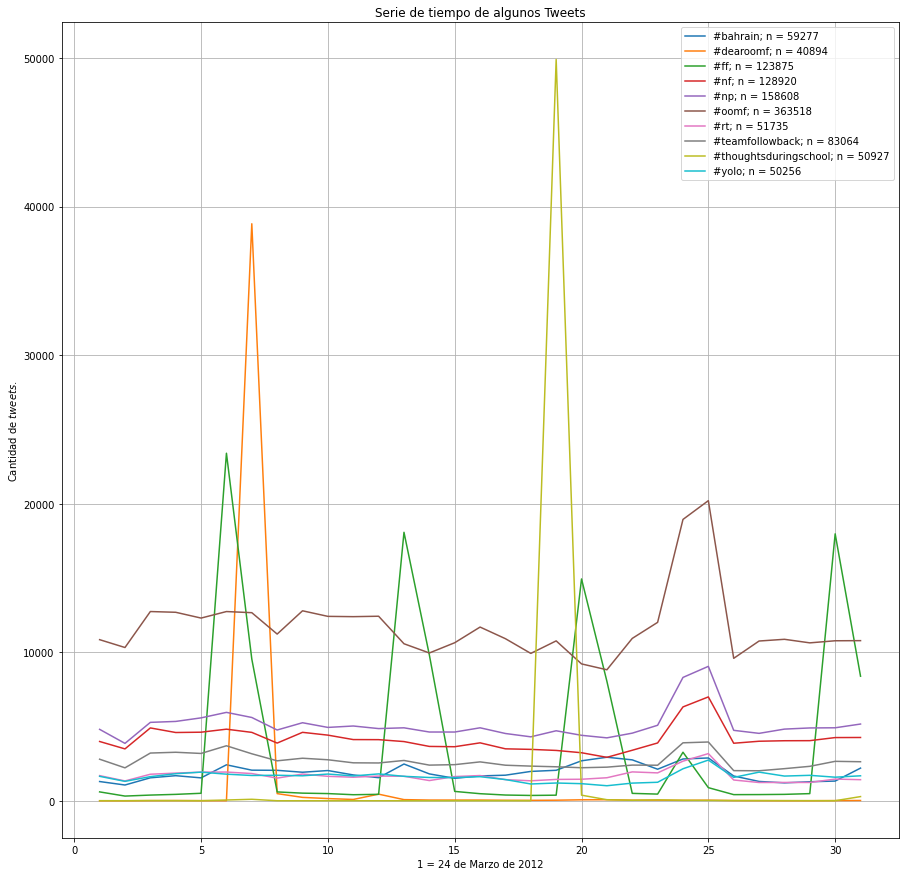

In [29]:
###### Data
#data_follow = get_data_followers_and_friends()
import datetime as dt

## Makes graphs
G_follow = nx.Graph()
#nx.from_pandas_edgelist(df = data_follow,
#                        source = 'source',
#                        target = 'target',
#                        create_using=G_follow)

#nx.draw(G_follow)
#plt.show()

#all_tweets
#name_hastag = all_tweets[0:5]

#order = sorted(name_all_hastag, key=lambda x: name_all_hastag[x], reverse=True)
#print(order[0:100])


def giveday(timestamp):
    day_string = timestamp.day
    return day_string


fig = plt.figure(figsize = (15,15))
for name_h in name_all_hastag:
  #wihtelist = ['wheniwaslittle', 'oomf','yolo','10factsaboutme','sorrynotsorry']
  wihtelist = ['oomf',
               'np',
               'nf',
               'ff',
               'teamfollowback',
               'bahrain',
               'rt',
               'thoughtsduringschool',
               'yolo',
               'dearoomf']
  #wihtelist = ['youvedoneittoo',
  #             'iwonderif',
  #             'weed',
  #             'truestory '
  #             'immadbecause',
  #             'butyouathug',
  #             'stfu',
  #             'bored',
  #             'ifweweretogetherrightnow',
  #             'icantlivewithout',
  #             'thatdepressingmoment']
  if name_h in wihtelist:
    print(name_h)
    #print(name_h, len(name_all_hastag[name_h]))
  #name_h = 'sorrynotsorry'
    prueba = name_all_hastag[name_h]
    #del prueba[0]
    prueba = [ k.split(',') for k in prueba ]
    df_final = pd.DataFrame(prueba, columns = ['time','userid'])
    #path_final_csv = '/content/gen_csv/{}.csv'.format(name_h)
    #df_final.to_csv(path_or_buf=path_final_csv)
    df_final['time'] = pd.to_datetime(df_final['time'],unit='s')

    df_final['day'] = df_final['time'].apply(giveday)
    days = df_final.groupby('day')
    daycount = days['day'].count()
    timedict = daycount.to_dict()

    plt.plot(list(timedict.keys()), list(timedict.values()),
             label = "#{}; n = {}".format(name_h,
                                          np.sum(list(timedict.values()))))
    #plt.xticks(list(timedict.keys()), fontsize=15, rotation=90)

plt.title("Serie de tiempo de algunos Tweets")
plt.ylabel("Cantidad de $tweets$.")
plt.xlabel("1 = 24 de Marzo de 2012")
plt.legend()
plt.grid()
#plt.show()
plt.savefig(fname = "/content/images/ts_tweets_max.pdf")
  

# **Algunas cosas más**

In [ ]:
data_follow = get_data_followers_and_friends()
name_h = 'sorrynotsorry'
path_final_csv = '/content/drive/My Drive/NetworkAnalysis_TwitterTrends/clean_data/datatime/{}.csv'.format(name_h)
df_ts = pd.read_csv(path_final_csv)
social_network = data_follow[data_follow['source'].isin(df_ts['userid'])]
## Makes graphs
G_follow = nx.Graph()
nx.from_pandas_edgelist(df = social_network,
                        source = 'source',
                        target = 'target',
                        create_using=G_follow)

df_ts['time'] = pd.to_datetime(df_ts['time'],unit='s')

nx.betweenness_centrality(G_follow)

KeyboardInterrupt: ignored